<a href="https://colab.research.google.com/github/sallytran02/IS4487/blob/main/lab7_retailer_eda2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# IS 4487 Lab 7

## Outline

Begin where you left on in Lab 6 with the *SuperStore Retail Orders* dataset

<a href="https://colab.research.google.com/github/Stan-Pugsley/is_4487_base/blob/main/Labs/Scripts/lab7_retailer_eda2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Load Libraries

➡️ Assignment Tasks
- Load any necessary libraries

In [44]:
import pandas as pd
import matplotlib as mpl
import sklearn as sl
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt

## Import Data into Dataframe

➡️ Assignment Tasks
- Import data from the SuperStore retail dataset into a dataframe (in GitHub go to Labs > DataSets)
- Describe or profile the dataframe

In [45]:
df = pd.read_csv (r'/content/superstore_retail_orders-2.csv')

df.describe()


,order_id,quantity,product_price
count,56045.000000,56006.000000,56045.000000
mean,61668.066340,3.348498,6195.540505
std,7508.229651,422.646565,35784.727716
min,45079.000000,1.000000,2.290000
25%,55644.000000,1.000000,7.950000
50%,61869.000000,1.000000,475.600000
75%,68097.000000,2.000000,914.620000
max,74147.000000,100000.000000,235481.000000


In [46]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 56045 entries, 0 to 56044
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   order_id          56045 non-null  int64  
 1   order_date        56013 non-null  object 
 2   order_year_month  56013 non-null  object 
 3   customer_name     56045 non-null  object 
 4   city              55571 non-null  object 
 5   state_province    55571 non-null  object 
 6   quantity          56006 non-null  float64
 7   product_name      56045 non-null  object 
 8   product_line      56045 non-null  object 
 9   product_price     56045 non-null  float64
dtypes: float64(2), int64(1), object(7)
memory usage: 4.3+ MB


## Prepare Data

➡️ Assignment Tasks
- Convert any numbers into the correct datatype if they are not already numeric
- Convert any character variables in to factors if they are appropriate for that datatype
- Check for outliers.   Remove any outliers that appear to be mistakes
- Remove rows with empty (NULL) values
- Identify at least one variable with a missing value that can be imputed.   Fill in those empty values.
- Add a "total_amount" variable based on the quantity and price

In [47]:
#data preparation

df['city'] = df['city'].astype('category')

df['product_line'] = df['product_line'].astype('category')

print(df)


       order_id  order_date order_year_month     customer_name  \
0         51188  2021-07-01          2021-07     Audrey Blanco   
1         51187  2021-07-01          2021-07       Isaac Allen   
2         51199  2021-07-02          2021-07        Ian Morgan   
3         51241  2021-07-04          2021-07        Alexa Bell   
4         51297  2021-07-08          2021-07        Casey Diaz   
...         ...         ...              ...               ...   
56040     74084  2022-06-29          2022-06        Ian Rogers   
56041     74062  2022-06-29          2022-06   Marcus Anderson   
56042     74065  2022-06-29          2022-06  Nathaniel Howard   
56043     74038  2022-06-29          2022-06        Robin Sanz   
56044     74110  2022-06-30          2022-06   Mallory Jimenez   

                    city             state_province  quantity  \
0      North Cherylmouth  NEW HAMPSHIRE                   3.0   
1             Traceyland  WEST VIRGINIA                   4.0   
2           

In [48]:
#check outliers

#select numeric columns where you suspect outliers
numeric_columns = ['quantity', 'product_price']

#calculate z-scores
z_scores = np.abs(stats.zscore(df[numeric_columns]))

#set threshold
threshold = 3

#identify outliers
outliers = df[(z_scores > threshold).any(axis=1)]

print(outliers)


       order_id  order_date order_year_month     customer_name  \
36547     51189  2021-07-02          2021-07     Tabitha Gomez   
36548     51316  2021-07-09          2021-07      Bethany Deng   
36549     51390  2021-07-13          2021-07  Deanna Rodriguez   
36550     51428  2021-07-16          2021-07       Margaret He   
36551     51578  2021-07-25          2021-07       Gilbert Pal   
...         ...         ...              ...               ...   
37874     74013  2022-06-28          2022-06    Brandi Serrano   
37875     74012  2022-06-28          2022-06    Brandon Sharma   
37876     73950  1922-06-28          1922-06         Kurt Deng   
37877     74044  2022-06-29          2022-06    Andre Gonzalez   
37878     74143  2022-06-30          2022-06     Troy Gonzalez   

                    city             state_province  quantity  \
36547       Lake Katrina  NEW YORK                        2.0   
36548  South Melissafort  HAWAII                          3.0   
36549      C

In [49]:
#cleanup outliers

#handle invalid values
df['order_year_month'] = pd.to_datetime(df['order_year_month'], errors='coerce')

#filter our product prices over 200k
df = df[df['product_price'] <= 200000]

#filter our quantities over 100k
df = df[df['quantity'] <= 100000]

#extract year component and create new column called 'order_year'
df['order_year'] = df['order_year_month'].dt.year

#filter data for the years 2000 to 2022
df = df[(df['order_year'] >= 2000) & (df['order_year'] <= 2022)]

print(df)

       order_id  order_date order_year_month     customer_name  \
0         51188  2021-07-01       2021-07-01     Audrey Blanco   
1         51187  2021-07-01       2021-07-01       Isaac Allen   
2         51199  2021-07-02       2021-07-01        Ian Morgan   
3         51241  2021-07-04       2021-07-01        Alexa Bell   
4         51297  2021-07-08       2021-07-01        Casey Diaz   
...         ...         ...              ...               ...   
56040     74084  2022-06-29       2022-06-01        Ian Rogers   
56041     74062  2022-06-29       2022-06-01   Marcus Anderson   
56042     74065  2022-06-29       2022-06-01  Nathaniel Howard   
56043     74038  2022-06-29       2022-06-01        Robin Sanz   
56044     74110  2022-06-30       2022-06-01   Mallory Jimenez   

                    city             state_province  quantity  \
0      North Cherylmouth  NEW HAMPSHIRE                   3.0   
1             Traceyland  WEST VIRGINIA                   4.0   
2           

In [50]:
#impute values

#identify numeric and categorical variables with missing values
numeric_missing = df.select_dtypes(include='number').columns[df.select_dtypes(include='number').isna().any()].tolist()
categorical_missing = df.select_dtypes(exclude='number').columns[df.select_dtypes(exclude='number').isna().any()].tolist()

print(numeric_missing)
print(categorical_missing)

#impute missing values for numeric variables (fill with average value)
for var in numeric_missing:
    df[var].fillna(df[var].mean(), inplace=True)

#impute missing values for categorical variables (fill with most frequent value)
for var in categorical_missing:
    df[var].fillna(df[var].mode()[0], inplace=True)

print(df)



[]
['city', 'state_province']
       order_id  order_date order_year_month     customer_name  \
0         51188  2021-07-01       2021-07-01     Audrey Blanco   
1         51187  2021-07-01       2021-07-01       Isaac Allen   
2         51199  2021-07-02       2021-07-01        Ian Morgan   
3         51241  2021-07-04       2021-07-01        Alexa Bell   
4         51297  2021-07-08       2021-07-01        Casey Diaz   
...         ...         ...              ...               ...   
56040     74084  2022-06-29       2022-06-01        Ian Rogers   
56041     74062  2022-06-29       2022-06-01   Marcus Anderson   
56042     74065  2022-06-29       2022-06-01  Nathaniel Howard   
56043     74038  2022-06-29       2022-06-01        Robin Sanz   
56044     74110  2022-06-30       2022-06-01   Mallory Jimenez   

                    city             state_province  quantity  \
0      North Cherylmouth  NEW HAMPSHIRE                   3.0   
1             Traceyland  WEST VIRGINIA        

In [51]:
#add total amount column

df['total_amount'] = df['quantity'] * df['product_price']

print(df)

       order_id  order_date order_year_month     customer_name  \
0         51188  2021-07-01       2021-07-01     Audrey Blanco   
1         51187  2021-07-01       2021-07-01       Isaac Allen   
2         51199  2021-07-02       2021-07-01        Ian Morgan   
3         51241  2021-07-04       2021-07-01        Alexa Bell   
4         51297  2021-07-08       2021-07-01        Casey Diaz   
...         ...         ...              ...               ...   
56040     74084  2022-06-29       2022-06-01        Ian Rogers   
56041     74062  2022-06-29       2022-06-01   Marcus Anderson   
56042     74065  2022-06-29       2022-06-01  Nathaniel Howard   
56043     74038  2022-06-29       2022-06-01        Robin Sanz   
56044     74110  2022-06-30       2022-06-01   Mallory Jimenez   

                    city             state_province  quantity  \
0      North Cherylmouth  NEW HAMPSHIRE                   3.0   
1             Traceyland  WEST VIRGINIA                   4.0   
2           

In [52]:
#remove rows with missing values
df = df.dropna()

print(df.info())


<class 'pandas.core.frame.DataFrame'>
Int64Index: 54442 entries, 0 to 56044
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   order_id          54442 non-null  int64         
 1   order_date        54442 non-null  object        
 2   order_year_month  54442 non-null  datetime64[ns]
 3   customer_name     54442 non-null  object        
 4   city              54442 non-null  category      
 5   state_province    54442 non-null  object        
 6   quantity          54442 non-null  float64       
 7   product_name      54442 non-null  object        
 8   product_line      54442 non-null  category      
 9   product_price     54442 non-null  float64       
 10  order_year        54442 non-null  float64       
 11  total_amount      54442 non-null  float64       
dtypes: category(2), datetime64[ns](1), float64(4), int64(1), object(4)
memory usage: 5.1+ MB
None


## Prepare Data - Continued

➡️ Assignment Tasks
- Create a variable called "complete_customer_info".   Use "1" for True and "2" for False.  All customer fields must be valid and not empty before this variable is True.
- Create a bar chart showing the count of customers with complete informaiton versus incomplete information

In [53]:
#create variable

#create the complete_customer_info variable
df['complete_customer_info'] = (df['customer_name'].notnull() &
                                df['city'].notnull() &
                                df['state_province'].notnull()).astype(int)

#map the values to "1" for True and "2" for False
df['complete_customer_info'] = df['complete_customer_info'].map({1: 'Complete', 0: 'Incomplete'})



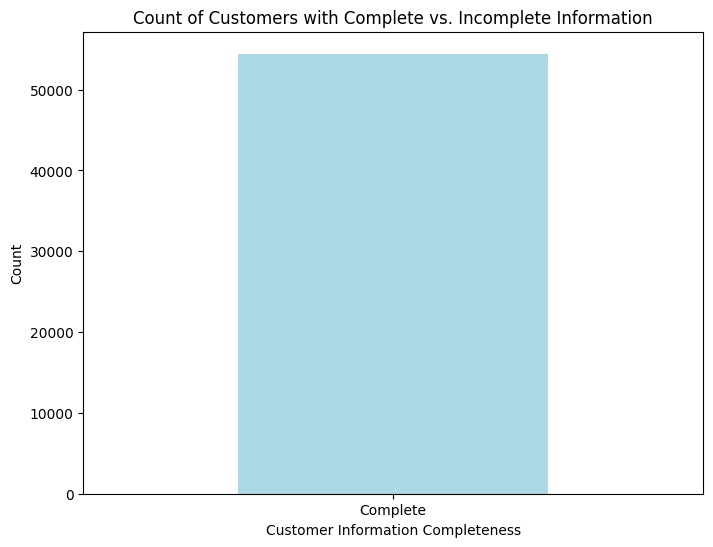

In [54]:
#create chart

#create a bar chart
plt.figure(figsize=(8, 6))
df['complete_customer_info'].value_counts().plot(kind='bar', color=['lightblue', 'pink'])
plt.title('Count of Customers with Complete vs. Incomplete Information')
plt.xlabel('Customer Information Completeness')
plt.ylabel('Count')
plt.xticks(rotation=0)
plt.show()

## Prepare Data - Continued

➡️ Assignment Tasks
- Create seasonal buckets for Winter, Sprint, Summer, Fall
- Create a chart to show revenue by season
- Create a chart to show revenue by year

In [55]:
#seasonality

#create seasonal buckets
seasons = {
    1: 'Winter', 2: 'Winter', 3: 'Spring',
    4: 'Spring', 5: 'Spring', 6: 'Summer',
    7: 'Summer', 8: 'Summer', 9: 'Fall',
    10: 'Fall', 11: 'Fall', 12: 'Winter'
}

df['order_month'] = pd.to_datetime(df['order_year_month']).dt.month
df['season'] = df['order_month'].map(seasons)

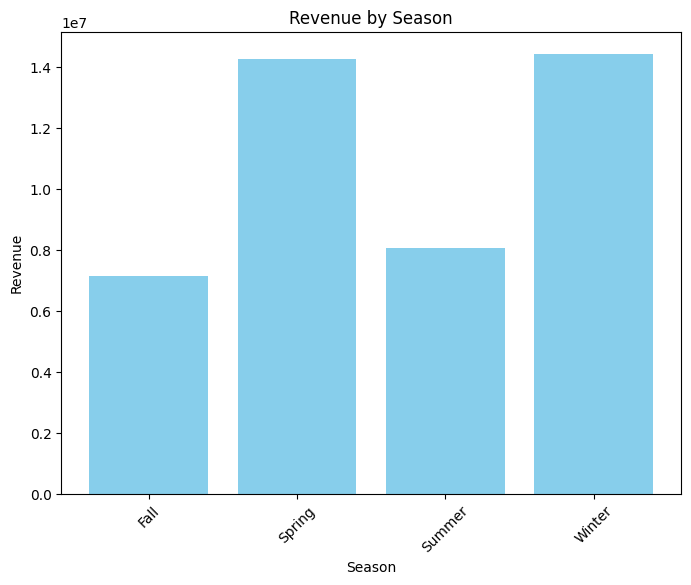

In [56]:
#revenue by season
revenue_by_season = df.groupby('season')['total_amount'].sum().reset_index()

plt.figure(figsize=(8, 6))
plt.bar(revenue_by_season['season'], revenue_by_season['total_amount'], color='skyblue')
plt.title('Revenue by Season')
plt.xlabel('Season')
plt.ylabel('Revenue')
plt.xticks(rotation=45)
plt.show()

In [57]:
print(df['order_year'].unique())

[2021. 2022. 2020.]


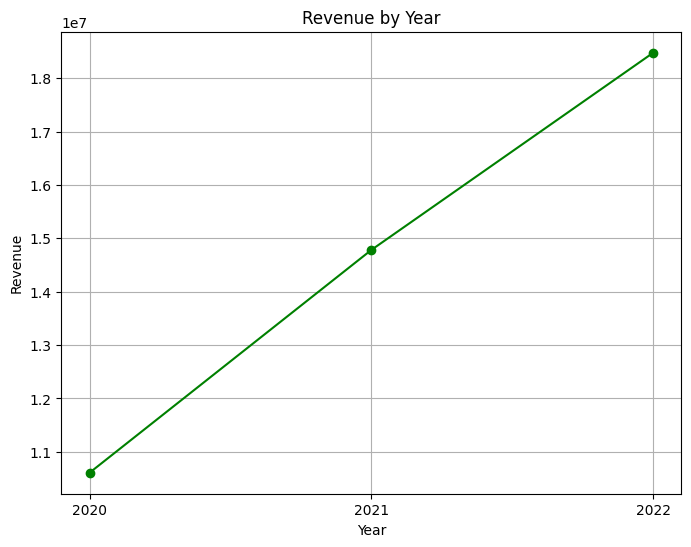

In [58]:
#revenue by year

df['order_year'] = pd.to_datetime(df['order_year_month']).dt.year
revenue_by_year = df.groupby('order_year')['total_amount'].sum().reset_index()

plt.figure(figsize=(8, 6))
plt.plot(revenue_by_year['order_year'], revenue_by_year['total_amount'], marker='o', color='green')
plt.title('Revenue by Year')
plt.xlabel('Year')
plt.ylabel('Revenue')
plt.xticks(revenue_by_year['order_year'])
plt.grid(True)
plt.show()

## Prepare Data - Continued

➡️ Assignment Tasks
- Create a variable that will group product lines into "Outdoor" versus "Indoor" products.
- Create a plot to show the correlation between outdoor/indoor versus season  

In [59]:
unique_product_lines = df['product_line'].unique()
print(unique_product_lines)


['Mobile', 'Bikes', 'Cameras', 'Electronics', 'Accessories', 'Clothing', 'Projector', 'Laptop', 'OfficeProducts']
Categories (9, object): ['Accessories', 'Bikes', 'Cameras', 'Clothing', ..., 'Laptop', 'Mobile',
                         'OfficeProducts', 'Projector']


<Figure size 1000x600 with 0 Axes>

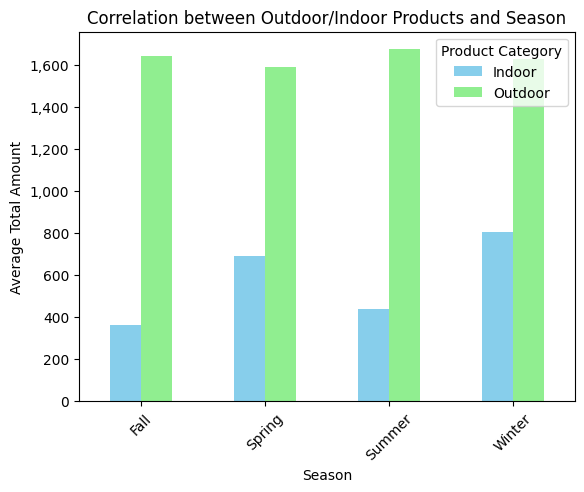

In [60]:
#indoor outdoor variable (with cameras considered as outdoor)

#define criteria to categorize product lines as "Outdoor" or "Indoor"
outdoor_product_lines = ['Bikes', 'Cameras']
indoor_product_lines = ['Mobile', 'Electronics', 'Accessories', 'Clothing', 'Projector', 'Laptop', 'OfficeProducts']

# Create a new column to store the categorization
df['product_category'] = df['product_line'].apply(lambda x: 'Outdoor' if x in outdoor_product_lines else 'Indoor')

# Group the data by season and product category
correlation_data = df.groupby(['season', 'product_category'])['total_amount'].mean().reset_index()

# Pivot the table to prepare for plotting
pivot_table = correlation_data.pivot(index='season', columns='product_category', values='total_amount')

# Plot the correlation
plt.figure(figsize=(10, 6))
pivot_table.plot(kind='bar', color=['skyblue', 'lightgreen'])
plt.title('Correlation between Outdoor/Indoor Products and Season')
plt.xlabel('Season')
plt.ylabel('Average Total Amount')
plt.xticks(rotation=45)
plt.legend(title='Product Category')
plt.gca().yaxis.set_major_formatter('{:,.0f}'.format)
plt.show()


<Figure size 1000x600 with 0 Axes>

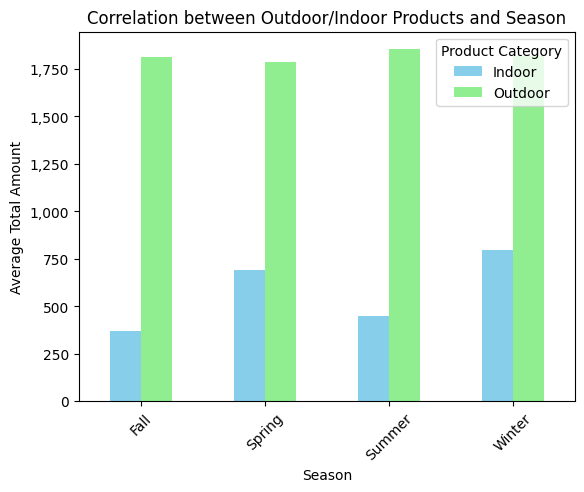

In [61]:
#indoor outdoor variable (with cameras considered as indoor)

#define criteria to categorize product lines as "Outdoor" or "Indoor"
outdoor_product_lines = ['Bikes']
indoor_product_lines = ['Mobile', 'Cameras', 'Electronics', 'Accessories', 'Clothing', 'Projector', 'Laptop', 'OfficeProducts']

#create a new column to store the categorization
df['product_category'] = df['product_line'].apply(lambda x: 'Outdoor' if x in outdoor_product_lines else 'Indoor')

#group the data by season and product category
correlation_data = df.groupby(['season', 'product_category'])['total_amount'].mean().reset_index()

#pivot the table to prepare for plotting
pivot_table = correlation_data.pivot(index='season', columns='product_category', values='total_amount')

# Plot the correlation
plt.figure(figsize=(10, 6))
pivot_table.plot(kind='bar', color=['skyblue', 'lightgreen'])
plt.title('Correlation between Outdoor/Indoor Products and Season')
plt.xlabel('Season')
plt.ylabel('Average Total Amount')
plt.xticks(rotation=45)
plt.legend(title='Product Category')
plt.gca().yaxis.set_major_formatter('{:,.0f}'.format)
plt.show()